<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

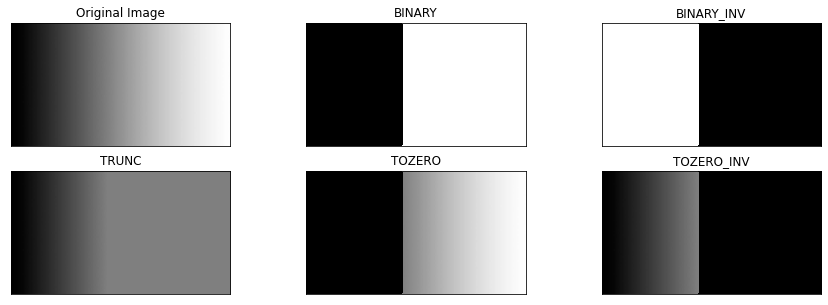

In [16]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], cmap='gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

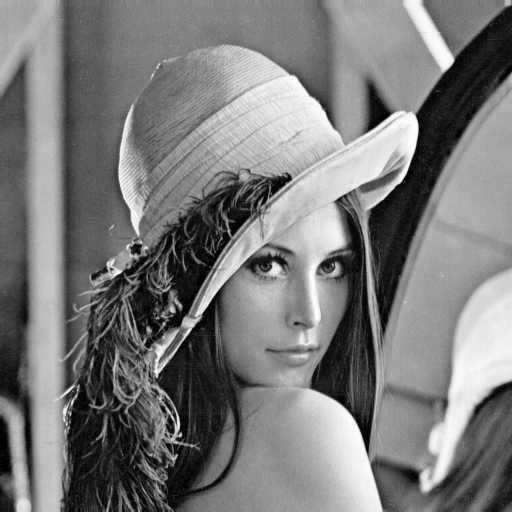

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


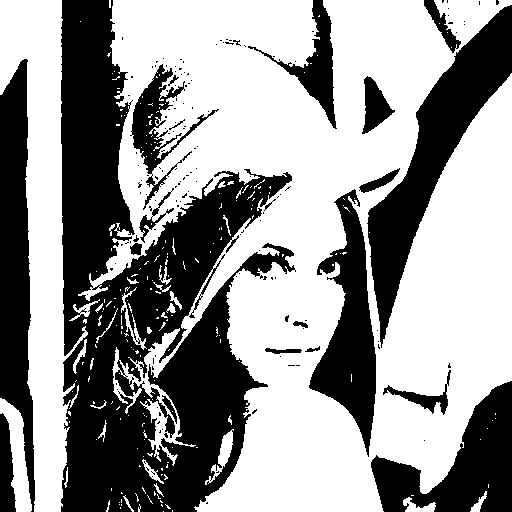

In [17]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

histo = cv.calcHist([image_gray], [0], None, [255], [0, 255])
cv2_imshow(image_gray)
within=[]
for i in range(len(histo)):
  x,y = np.split(histo, [i])
  x1 = np.sum(x)/(image.shape[0]*image.shape[1])  # weight of class 1
  y1 = np.sum(y)/(image.shape[0]*image.shape[1])
  x2 = np.sum([j*t for j,t in enumerate(x)])/np.sum(x)
  y2 = np.sum([j*t for j,t in enumerate(y)])/np.sum(y)
  x3 = np.sum([(j-x2)**2*t for j, t in enumerate(x)])/np.sum(x)
  x3 = np.nan_to_num(x3)

  y3 = np.sum([(j-y2)**2*t for j, t in enumerate(y)])/np.sum(y)

  within.append(x1*x3 + y1*y3)
m = np.argmin(within)
# print(m)
(thresh, Bin) = cv.threshold(image_gray, m, 255, cv.THRESH_BINARY)
cv2_imshow(Bin)
